In [1]:
%%html
<style>
img {float:left}
</style>

<img alt="sbmlutils logo" src="./images/sbmlutils-logo-small.png" style="height: 60px;" />
# sbmlutils: Python utilities for SBML

[![Build Status](https://travis-ci.org/matthiaskoenig/sbmlutils.svg?branch=develop)](https://travis-ci.org/matthiaskoenig/sbmlutils)[![Documentation Status](https://readthedocs.org/projects/sbmlutils/badge/?version=latest)](http://sbmlutils.readthedocs.io/en/latest/) [![codecov](https://codecov.io/gh/matthiaskoenig/sbmlutils/branch/develop/graph/badge.svg)](https://codecov.io/gh/matthiaskoenig/sbmlutils) [![License (LGPL version 3)](https://img.shields.io/badge/license-LGPLv3.0-blue.svg?style=flat-square)](http://opensource.org/licenses/LGPL-3.0) [![DOI](https://zenodo.org/badge/55952847.svg)](https://zenodo.org/badge/latestdoi/55952847)<br />

`sbmlutils` is a collection of python utilities for working with [SBML](http://www.sbml.org) models 
implemented on top of the [libSBML](http://sbml.org/Software/libSBML) python bindings.

Features among others

* HTML reports of SBML models
* helpers for model creation, manipulation, and annotation
* interpolation functions to add experimental data to models
* dynamic flux balance analysis (DFBA)
* file converters (XPP)

The project code is available from [https://github.com/matthiaskoenig/sbmlutils](https://github.com/matthiaskoenig/sbmlutils)  
Slides available at http://bit.ly/sbmlutils-flash

## Installation
```
pip install sbmlutils
```

## SBML report
* create HTML reports of SBML files
* easy navigation and filtering
* `fbc` and `comp` support

[./examples/glucose/Hepatic_glucose_3.html](./examples/glucose/Hepatic_glucose_3.html)

In [5]:
from sbmlutils.report import sbmlreport
sbmlreport.create_sbml_report('./examples/glucose/Hepatic_glucose_3.xml', 
                              out_dir='./examples/glucose', validate=True)

--------------------------------------------------------------------------------
./examples/glucose/Hepatic_glucose_3.xml
valid                    : TRUE
check time (ms)          : 0.405
--------------------------------------------------------------------------------


## SBML model creator
* helper functions for generation of SBML models
* constructors with all fields 
* patterns (like generate `Parameters` for `AssignmentRules`)
* `fbc` and `comp` helpers
* unit support

https://sbmlutils.readthedocs.io/en/latest/notebooks/modelcreator.html#Create-FBA-Model

## Misc (small helpers)
* Data to splines & piecewise functions
* Model annotation based on flat files and regular expressions
* converters (XPP -> SBML)

<img alt="sbmlutils logo" src="./images/interpolation_constant.png"/>
<img alt="sbmlutils logo" src="./images/interpolation_linear.png"/>
<img alt="sbmlutils logo" src="./images/interpolation_cubic.png"/>

## Dynamic Flux Balance Analysis (DFBA)
* DFBA model creation & simulation 
### SBML encoding
* implementation of DFBA based on SBML `core`, `comp` and `fbc`
* Proposed encoding: http://bit.ly/dfba-guidelines
* 2 implementations: sbmlutils & iBioSim
* Discussed/presented: **Thursday, 11.00**

In [6]:
from __future__ import absolute_import, print_function
import os
import tempfile

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba import utils

from sbmlutils.dfba.toy_wholecell import settings as toysettings
from sbmlutils.dfba.toy_wholecell import model_factory as toyfactory
from sbmlutils.dfba.toy_wholecell import simulate as toysimulate

test_dir = tempfile.mkdtemp()

# create toy model
toyfactory.create_model(test_dir)
sbml_path = os.path.join(utils.versioned_directory(test_dir, toyfactory.version),
                         toysettings.top_file)
print(sbml_path)

Create directory: /tmp/tmpfrau2r0z/v12
--------------------------------------------------------------------------------
/tmp/tmpfrau2r0z/v12/toy_wholecell_fba.xml
valid                    : TRUE
check time (ms)          : 0.011
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
/tmp/tmpfrau2r0z/v12/toy_wholecell_bounds.xml
valid                    : TRUE
check time (ms)          : 0.012
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
/tmp/tmpfrau2r0z/v12/toy_wholecell_update.xml
valid                    : TRUE
check time (ms)          : 0.008
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
/tmp/tmpfrau2r0z/v12/toy_wholecell_top.xml
valid                


Simulation time     : 0.210 [s]
Total time          : 0.295 [s]
Overhead time       : 0.086 [s] (29.0 %)

* DFBA Solution is UNIQUE *


,time,[A],[C],[D],[dummy_S],[fba__A],[fba__B1],[fba__B2],[fba__C],EX_A,...,fba__ub_default,fba__zero,k_R4,lb_EX_A,lb_EX_C,pEX_A,pEX_C,ub_EX_A,ub_EX_C,ub_R1
0.0,0.0,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,...,1000.0,0.0,0.1,-100.000000,0.000000,-1.000000,1.000000,1000.0,1000.0,1.000000
1.0,1.0,9.000000,0.951626,0.048374,0.0,0.0,0.0,0.0,0.0,-0.818731,...,1000.0,0.0,0.1,-90.000000,-9.516258,-0.818731,0.818731,1000.0,1000.0,0.818731
2.0,2.0,8.181269,1.640192,0.178539,0.0,0.0,0.0,0.0,0.0,-0.670320,...,1000.0,0.0,0.1,-81.812693,-16.401919,-0.670320,0.670320,1000.0,1000.0,0.670320
3.0,3.0,7.510949,2.122001,0.367049,0.0,0.0,0.0,0.0,0.0,-0.548811,...,1000.0,0.0,0.1,-75.109491,-21.220014,-0.548811,0.548811,1000.0,1000.0,0.548811
4.0,4.0,6.962138,2.442333,0.595529,0.0,0.0,0.0,0.0,0.0,-0.449323,...,1000.0,0.0,0.1,-69.621378,-24.423330,-0.449323,0.449323,1000.0,1000.0,0.449323
5.0,5.0,6.512814,2.637502,0.849683,0.0,0.0,0.0,0.0,0.0,-0.367873,...,1000.0,0.0,0.1,-65.128144,-26.375023,-0.367873,0.367873,1000.0,1000.0,0.367873
6.0,6.0,6.144941,2.736589,1.118470,0.0,0.0,0.0,0.0,0.0,-0.301187,...,1000.0,0.0,0.1,-61.449411,-27.365889,-0.301187,0.301187,1000.0,1000.0,0.301187
7.0,7.0,5.843754,2.762785,1.393460,0.0,0.0,0.0,0.0,0.0,-0.246589,...,1000.0,0.0,0.1,-58.437541,-27.627855,-0.246589,0.246589,1000.0,1000.0,0.246589
8.0,8.0,5.597165,2.734532,1.668303,0.0,0.0,0.0,0.0,0.0,-0.201888,...,1000.0,0.0,0.1,-55.971651,-27.345320,-0.201888,0.201888,1000.0,1000.0,0.201888
9.0,9.0,5.395277,2.666429,1.938295,0.0,0.0,0.0,0.0,0.0,-0.165291,...,1000.0,0.0,0.1,-53.952767,-26.664287,-0.165291,0.165291,1000.0,1000.0,0.165291


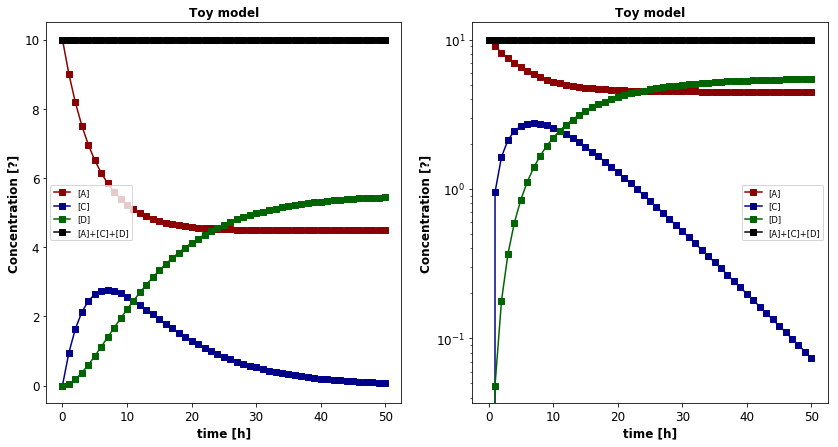

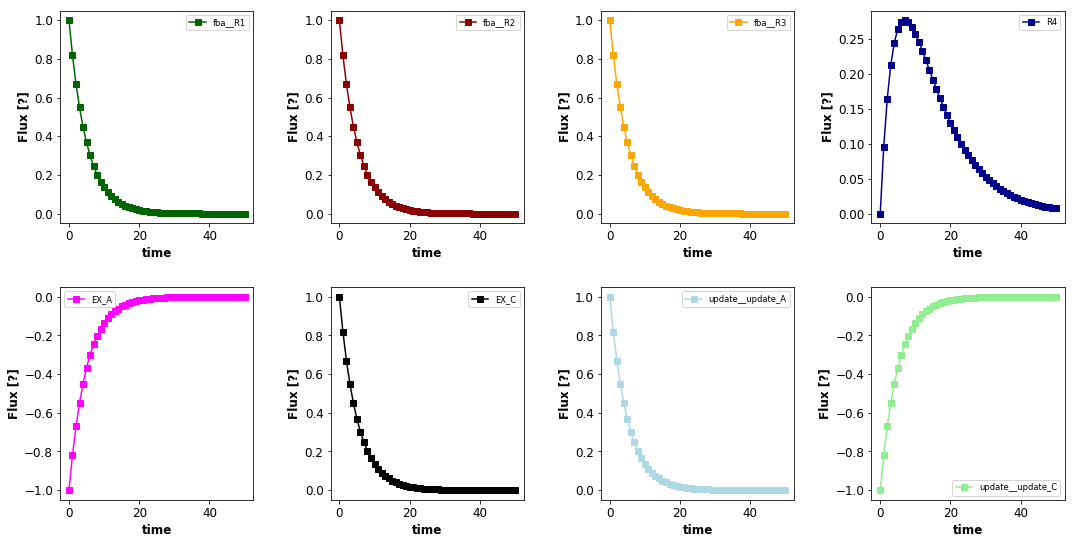

In [7]:
from IPython.display import display, HTML
# simulate
dfs = toysimulate.simulate_toy(sbml_path, test_dir, dts=[1.0], figures=False)
display(dfs[0].head(10))
toysimulate.print_species(dfs=dfs)
toysimulate.print_fluxes(dfs=dfs)